<a href="https://colab.research.google.com/github/kukretinishtha/MachineLearning/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
"""
A riding-mower manufacturer MOW-EASE took part in a Industrial
Exhibition in which it got an opportunity to show a demo of its
product to 180 different audience. The land owned by each of the
audience and their approximate income have been recorded in the
file RidingMowers.csv
"""

'\nA riding-mower manufacturer MOW-EASE took part in a Industrial\nExhibition in which it got an opportunity to show a demo of its\nproduct to 180 different audience. The land owned by each of the\naudience and their approximate income have been recorded in the\nfile RidingMowers.csv\n'

In [1]:
### Loading required libraries
import numpy as np
import pandas as pd

In [21]:
### Loading the dataset from drive
from google.colab import files
uploaded = files.upload()

Saving RidingMowers.csv to RidingMowers.csv


In [22]:
### Read the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['RidingMowers.csv']))
df.head()

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought


In [23]:
### Converting the data into dummy
dum_df = pd.get_dummies(df)   # pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
dum_df = dum_df.drop('Response_Not Bought', axis=1)  # Dropping the redundant column after getting the dummy data
dum_df.head()

,Income,Lot_Size,Response_Bought
0,34,26,0
1,34,40,0
2,34,46,0
3,34,48,0
4,34,53,0


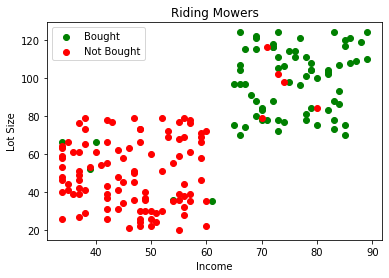

In [24]:
from sklearn.model_selection import train_test_split   # sklearn to split the data
from sklearn.metrics import confusion_matrix  # summary of prediction results on a classification problem
from sklearn.metrics import classification_report, accuracy_score # classification report is used to measure the quality of predictions from a classification algorithm.----------------- # Accuracy is the fraction of predictions our model got right.
from sklearn.neighbors import KNeighborsClassifier

X = dum_df.iloc[:,0:2]
y = dum_df.iloc[:,2]

#### Visualizing the Data
import matplotlib.pyplot as plt
X_B = X[y==1]
X_NB = X[y==0]
plt.scatter(X_B.Income,X_B.Lot_Size,c="green",label="Bought")
plt.scatter(X_NB.Income,X_NB.Lot_Size,c="red",label="Not Bought")
plt.legend()
plt.title("Riding Mowers")
plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.show()

In [25]:
### Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[28  4]
 [ 2 20]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.83      0.91      0.87        22

    accuracy                           0.89        54
   macro avg       0.88      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54

0.8888888888888888


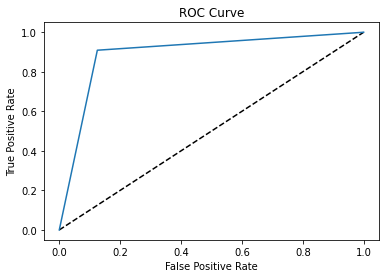

0.8920454545454545

In [26]:
"""
The Area Under the Curve (AUC) is the measure of the ability of a classifier to 
distinguish between classes and is used as a summary of the ROC curve. 
The higher the AUC, the better the performance of the model at distinguishing 
between the positive and negative classes.
"""
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

############ Plot ROC curve ############
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
########################################
roc_auc_score(y_test, y_pred_prob)

In [29]:
### Result
"""
The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 
denotes an excellent classifier. Hence the model roc auc score id 0.89 which is 
greater than 0.5 predicts that the model is good classifier.
"""

The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier. Hence the model roc auc score id 0.89 which is greater than 0.5 predicts that the model is good classifier.
